In [330]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [331]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')


In [332]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [333]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [334]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [335]:
df = pd.concat([train,test],sort=False)

In [336]:
df.shape

(16921, 9)

In [337]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [338]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [339]:
df.columns = map(str.lower,df.columns)

In [340]:
df['city'] = df['city'].replace(df[df['city'].str.contains('bang',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Bang',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Ker',na=False)]["city"].unique(),'kerala')
df['city'] = df['city'].replace(df[df['city'].str.contains('JP Nagar',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Mum',na=False)]["city"].unique(),'Mumbai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Bandra',na=False)]["city"].unique(),'Mumbai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Andheri',na=False)]["city"].unique(),'Mumbai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Maharashtra',na=False)]["city"].unique(),'Mumbai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Chen',na=False)]["city"].unique(),'Chennai')
df['city'] = df['city'].replace(df[df['city'].str.contains('chen',na=False)]["city"].unique(),'Chennai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Tamil',na=False)]["city"].unique(),'Chennai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Anna Salai',na=False)]["city"].unique(),'Chennai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Tambaram',na=False)]["city"].unique(),'Chennai')
df['city'] = df['city'].replace(df[df['city'].str.contains('Tela',na=False)]["city"].unique(),'Telangana')
df['city'] = df['city'].replace(df[df['city'].str.contains('Delhi',na=False)]["city"].unique(),'Delhi')
df['city'] = df['city'].replace(df[df['city'].str.contains('Karnataka',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Bengalore',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Bengalore',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Bengaluru',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Marathahalli',na=False)]["city"].unique(),'Bangalore')
df['city'] = df['city'].replace(df[df['city'].str.contains('Kochi',na=False)]["city"].unique(),'Kochi')
df['city'] = df['city'].replace(df[df['city'].str.contains('Hyder',na=False)]["city"].unique(),'Hyderabad')

In [341]:
df_d = df

In [342]:
df_d.shape

(16921, 9)

In [343]:
df_d.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [344]:
df_d.isna().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city              147
locality          128
rating              4
votes            1606
cost             4231
dtype: int64

In [345]:
df_d.columns = map(str.lower,df_d.columns)

In [346]:
df_d['locality'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ...,
       'Off Carter Road', 'SRM Back Gate', 'Perry Cross Road'],
      dtype=object)

In [347]:
df_d.dropna(subset=['city','locality'],how='all',inplace=True)

In [348]:
df_d.isna().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city               20
locality            1
rating              4
votes            1584
cost             4201
dtype: int64

In [349]:
df_d[df_d.locality.isna()]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
12181,None,3861,Asian,"11am – 11pm (Mon, Tue, Thu, Sun), 11am – 3pm...",Bangalore,NaN,NEW,NaN,300.0


In [350]:
df_d.city.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Delhi', 'Malad East', '682036', 'Noida',
       'Secunderabad', 'India', 'Madhuranagar', nan, 'Faridabad',
       'Chembur.', 'opp gurudwara Shakurpur', 'Telangana', 'Ghaziabad',
       'kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Near Reliance Fresh', 'Kilpauk', 'Kothaguda', 'Goregaon West',
       'Kakkanad', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Gachibowli',
       'Semmancheri', 'Powai (Next to Powai Plaza)', 'Dombivali East',
       'Kandivali', 'Dewan Rama Road', 'Gurugram', 'Sector 51 Noida',
       'Kaloor', 'Besant Nagar', 'Adjacent To Commercial Street',
       'Dwarka', '682035.', 'Kalyan West', 'Avadi', 'Kondapur',
       'Mehdipatnam', 'Gandipet', 'Velachery', 'Pallavaram',
       'Vijaya Nagar', 'BTM Layout',
       'Metro Pillar No 21. Mettuguda main road near railway degree college.',


In [351]:
df1=df_d.query(" city  not in ('Secunderabad','Ghaziabad','Telangana','Chennai','Bangalore','Noida','Mumbai','Kochi','Hyderabad','Delhi','Gurgaon','Faridabad','Ernakulam')")#.drop#["CITY"]

In [352]:
df1

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
14,QUICK BITES,15024,Maharashtrian,"Closed (Mon),11am – 11pm (Tue-Sun)",Thane West,Majiwada,4.0,160 votes,300.0
47,"CASUAL DINING,BAR",2003,"Continental, North Indian, Chinese, Healthy Food",12noon – 1am (Mon-Sun),Malad East,Film City Road,3.9,985 votes,1400.0
58,CASUAL DINING,4963,Kerala,"12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",682036,Kerala,4.0,145 votes,400.0
135,QUICK BITES,10311,Chinese,11am – 11pm (Mon-Sun),India,Telangana 500084,3.5,92 votes,250.0
...,...,...,...,...,...,...,...,...,...
4122,CASUAL DINING,10685,"North Indian, South Indian, Chinese, Continent...",11am – 11:30pm (Mon-Sun),Thane,Dombivali East,3.4,16 votes,NaN
4139,CASUAL DINING,9237,"North Indian, Chinese",5pm – 1am (Mon-Sun),Thane,Thane west,4.1,504 votes,NaN
4167,QUICK BITES,12015,Lebanese,4pm – 11pm (Mon-Sun),NaN,Chennai,3.7,124 votes,NaN
4177,DESSERT PARLOR,5425,Desserts,10:30am – 12:30AM (Mon-Sun),Opposite Ellora Building,Off Carter Road,4.2,1236 votes,NaN


In [353]:
df_d = df_d[~df_d.index.isin(df1.index)]
# df_d.city.unique()

In [354]:
df_d.city.unique()

array(['Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad', 'Kochi',
       'Delhi', 'Noida', 'Secunderabad', 'Faridabad', 'Telangana',
       'Ghaziabad', 'Ernakulam'], dtype=object)

In [355]:
df_d.shape

(15793, 9)

In [356]:
city_value = df_d[df_d['locality'].isnull()].city.str.split(" ", expand = True)[0] #Here i tried of splitting the city data to place the [0] position string into the locality part

In [357]:
city_value

12181    Bangalore
Name: 0, dtype: object

In [358]:
df_d['locality'].fillna('Kadubesanahalli',inplace=True)

In [359]:
df_d.isna().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city                0
locality            0
rating              4
votes            1475
cost             3883
dtype: int64

In [360]:
df_d[df_d['city'].isna()] # .locality.unique()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost


In [361]:
df_d.isna().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city                0
locality            0
rating              4
votes            1475
cost             3883
dtype: int64

In [362]:
df_d.shape

(15793, 9)

In [363]:
df_d.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800.0


In [364]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 4230
Data columns (total 9 columns):
title            15793 non-null object
restaurant_id    15793 non-null int64
cuisines         15793 non-null object
time             15793 non-null object
city             15793 non-null object
locality         15793 non-null object
rating           15789 non-null object
votes            14318 non-null object
cost             11910 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [365]:
df_df = df_d

In [366]:
df_df.votes

1        30 votes
2       221 votes
3        24 votes
4       165 votes
5       550 votes
          ...    
4226    287 votes
4227    469 votes
4228     53 votes
4229          NaN
4230     63 votes
Name: votes, Length: 15793, dtype: object

In [367]:
df_df.votes

1        30 votes
2       221 votes
3        24 votes
4       165 votes
5       550 votes
          ...    
4226    287 votes
4227    469 votes
4228     53 votes
4229          NaN
4230     63 votes
Name: votes, Length: 15793, dtype: object

In [368]:
df_df["votes"].fillna(df_df.votes.mode()[0],inplace = True)

In [369]:
df_df['votes'] = df_df['votes'].str.split(expand=True)[0]

In [370]:
df_df.isna().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city                0
locality            0
rating              4
votes               0
cost             3883
dtype: int64

In [371]:
df_df.votes.unique()

array(['30', '221', '24', ..., '2159', '3807', '1913'], dtype=object)

In [372]:
df_df.rating.unique()

array(['4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-', '4.5',
       '3.6', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [373]:
df_df.rating.mode()

0    3.9
dtype: object

In [374]:
df_df.replace({'-':df_df.rating.mode()[0],'NEW':df_df.rating.mode()[0]},inplace=True)

In [375]:
df_df.rating.unique()

array(['4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '4.5',
       '3.6', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [376]:
df_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 4230
Data columns (total 9 columns):
title            15793 non-null object
restaurant_id    15793 non-null int64
cuisines         15793 non-null object
time             15793 non-null object
city             15793 non-null object
locality         15793 non-null object
rating           15789 non-null object
votes            15793 non-null object
cost             11910 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [377]:
df_df = df_df.astype({'rating':'float'})

In [378]:
df_df.rating.fillna(df_df.rating.mode()[0],inplace=True)

In [379]:
df_df.rating.isna().sum()

0

In [380]:
df_df = df_df.astype({'votes':'int'})

In [381]:
df_df.drop(['locality','restaurant_id','time'],axis=1,inplace=True)

In [382]:
df_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 4230
Data columns (total 6 columns):
title       15793 non-null object
cuisines    15793 non-null object
city        15793 non-null object
rating      15793 non-null float64
votes       15793 non-null int64
cost        11910 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 863.7+ KB


In [383]:
df_df.head()

,title,cuisines,city,rating,votes,cost
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,4.2,30,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221,800.0
3,QUICK BITES,"Tibetan, Chinese",Mumbai,4.1,24,800.0
4,DESSERT PARLOR,Desserts,Mumbai,3.8,165,300.0
5,CASUAL DINING,"North Indian, Chinese, Seafood, Biryani",Mumbai,4.0,550,800.0


In [384]:
dfdf = df_df

In [385]:
dfdf.head()

,title,cuisines,city,rating,votes,cost
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,4.2,30,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221,800.0
3,QUICK BITES,"Tibetan, Chinese",Mumbai,4.1,24,800.0
4,DESSERT PARLOR,Desserts,Mumbai,3.8,165,300.0
5,CASUAL DINING,"North Indian, Chinese, Seafood, Biryani",Mumbai,4.0,550,800.0


In [386]:
title_counter_val = Counter([a for data in dfdf.title.str.split(',').tolist() for a in data])

In [387]:
title_counter_val

Counter({'CASUAL DINING': 5514,
         'BAR': 855,
         'QUICK BITES': 5758,
         'DESSERT PARLOR': 742,
         'CAFÉ': 1081,
         'MICROBREWERY': 95,
         'BEVERAGE SHOP': 306,
         'IRANI CAFE': 5,
         'BAKERY': 665,
         'None': 1123,
         'PUB': 179,
         'FINE DINING': 447,
         'SWEET SHOP': 208,
         'LOUNGE': 245,
         'FOOD COURT': 138,
         'MESS': 65,
         'KIOSK': 73,
         'CLUB': 38,
         'CONFECTIONERY': 6,
         'DHABA': 51,
         'MEAT SHOP': 3,
         'COCKTAIL BAR': 7,
         'FOOD TRUCK': 34,
         'PAAN SHOP': 5,
         'BHOJANALYA': 1})

In [388]:
for key,value in title_counter_val.items():
    dfdf.loc[(dfdf['title'].str.contains(key)),'title'] = key

In [389]:
dfdf.title.unique()

array(['CASUAL DINING', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ',
       'MICROBREWERY', 'None', 'BAR', 'PUB', 'BEVERAGE SHOP',
       'FINE DINING', 'BAKERY', 'FOOD COURT', 'LOUNGE', 'SWEET SHOP',
       'MESS', 'KIOSK', 'CLUB', 'DHABA', 'MEAT SHOP', 'CONFECTIONERY',
       'FOOD TRUCK', 'PAAN SHOP', 'IRANI CAFE', 'BHOJANALYA'],
      dtype=object)

In [390]:
dfdf.title.value_counts()

QUICK BITES       5752
CASUAL DINING     5514
None              1123
CAFÉ               860
DESSERT PARLOR     655
FINE DINING        400
BAKERY             369
BAR                254
BEVERAGE SHOP      202
LOUNGE             129
FOOD COURT         106
PUB                 73
KIOSK               66
MESS                65
SWEET SHOP          62
DHABA               51
MICROBREWERY        45
FOOD TRUCK          32
CLUB                25
PAAN SHOP            4
CONFECTIONERY        3
IRANI CAFE           1
BHOJANALYA           1
MEAT SHOP            1
Name: title, dtype: int64

In [391]:
dfdf.loc[(dfdf['title'] == 'None'),'title'] = 'FOOD SHOP'

In [392]:
dfdf['title'].replace({'SWEET SHOP':'BAKERY','CONFECTIONERY':'BAKERY','IRANI CAFE':'CAFÉ','BEVERAGE SHOP':'BAR','PUB':'BAR','CLUB':'BAR','MICROBREWERY':'BAR'},inplace=True)

In [393]:
dfdf.title.value_counts()

QUICK BITES       5752
CASUAL DINING     5514
FOOD SHOP         1123
CAFÉ               861
DESSERT PARLOR     655
BAR                599
BAKERY             434
FINE DINING        400
LOUNGE             129
FOOD COURT         106
KIOSK               66
MESS                65
DHABA               51
FOOD TRUCK          32
PAAN SHOP            4
BHOJANALYA           1
MEAT SHOP            1
Name: title, dtype: int64

In [394]:
dfdf.cuisines.value_counts()

North Indian, Chinese                                      671
North Indian                                               670
South Indian                                               661
Fast Food                                                  335
Chinese                                                    204
                                                          ... 
Cafe, Desserts, American                                     1
South Indian, North Indian, Chinese, Biryani, Beverages      1
North Indian, Kerala, Chinese, Continental                   1
Cafe, Italian, European, Asian                               1
Bakery, Fast Food, Beverages, Desserts                       1
Name: cuisines, Length: 4866, dtype: int64

In [395]:
dfdf['cuisines'] = dfdf.cuisines.str.lstrip()

In [396]:
cuisines_counter_val = Counter([a.strip() for data in dfdf.cuisines.str.split(',').tolist() for a in data])

In [397]:
cuisines_counter_val

Counter({'Asian': 563,
         'Modern Indian': 80,
         'Japanese': 178,
         'North Indian': 6762,
         'Chinese': 5465,
         'Biryani': 1578,
         'Hyderabadi': 172,
         'Tibetan': 61,
         'Desserts': 1403,
         'Seafood': 720,
         'Cafe': 1062,
         'Pizza': 639,
         'Burger': 441,
         'Bar Food': 42,
         'South Indian': 2861,
         'Fast Food': 2664,
         'Beverages': 1193,
         'Arabian': 490,
         'Mughlai': 953,
         'Parsi': 27,
         'Thai': 392,
         'Bakery': 824,
         'Momos': 451,
         'Continental': 1943,
         'European': 311,
         'Rolls': 315,
         'Andhra': 311,
         'Italian': 1428,
         'BBQ': 199,
         'Finger Food': 358,
         'Tea': 76,
         'American': 363,
         'Healthy Food': 259,
         'Coffee': 56,
         'Indonesian': 22,
         'Korean': 44,
         'Nepalese': 16,
         'Ice Cream': 433,
         'Mexican': 309,
      

In [398]:
dfdff = dfdf.cuisines.replace({' ':''})

In [399]:
dfdff.unique()

array(['Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', 'Tibetan, Chinese',
       ..., 'European, Mediterranean, Italian, Sushi',
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food'],
      dtype=object)

In [400]:
df_df['title'] = dfdf['title']

In [401]:
df_df.title.unique()

array(['CASUAL DINING', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ', 'BAR',
       'FOOD SHOP', 'FINE DINING', 'BAKERY', 'FOOD COURT', 'LOUNGE',
       'MESS', 'KIOSK', 'DHABA', 'MEAT SHOP', 'FOOD TRUCK', 'PAAN SHOP',
       'BHOJANALYA'], dtype=object)

In [402]:
df_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 4230
Data columns (total 6 columns):
title       15793 non-null object
cuisines    15793 non-null object
city        15793 non-null object
rating      15793 non-null float64
votes       15793 non-null int64
cost        11910 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 863.7+ KB


In [403]:
df_df.city.unique()

array(['Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad', 'Kochi',
       'Delhi', 'Noida', 'Secunderabad', 'Faridabad', 'Telangana',
       'Ghaziabad', 'Ernakulam'], dtype=object)

In [404]:
title_num_col = df_df.title.str.get_dummies(sep=',')

In [405]:
cuisines_num_col = df_df.cuisines.str.get_dummies(sep=',')

In [406]:
city_num_col = df_df.city.str.get_dummies()

In [407]:
df_df.isna().sum()

title          0
cuisines       0
city           0
rating         0
votes          0
cost        3883
dtype: int64

In [408]:
df_df = pd.concat([df_df,title_num_col,cuisines_num_col,city_num_col],axis='columns')

In [409]:
df_df.drop(['title','cuisines','city'],axis='columns',inplace=True)

In [410]:
df_df_backup = df_df

In [411]:
df_df_backup.head()

,rating,votes,cost,BAKERY,BAR,BHOJANALYA,CAFÉ,CASUAL DINING,DESSERT PARLOR,DHABA,...,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kochi,Mumbai,Noida,Secunderabad,Telangana
1,4.2,30,1500.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.8,165,300.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,4.0,550,800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [280]:
# df_df.drop(['rating','votes'],axis='columns',inplace=True)

In [304]:
# df_df = df_df_backup

In [412]:
df_df.head()

,rating,votes,cost,BAKERY,BAR,BHOJANALYA,CAFÉ,CASUAL DINING,DESSERT PARLOR,DHABA,...,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kochi,Mumbai,Noida,Secunderabad,Telangana
1,4.2,30,1500.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.8,165,300.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,4.0,550,800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [413]:
df_cat_col.head()

,title,cuisines,time,city,locality,rating,votes
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes


In [414]:
df_df.shape

(15793, 260)

In [415]:
df_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 1 to 4230
Columns: 260 entries, rating to Telangana
dtypes: float64(2), int64(258)
memory usage: 31.4 MB


In [416]:
train_preprocessed = df_df[df_df["cost"].notna()]

In [417]:
test_preprocessed = df_df[df_df["cost"].isna()]

In [418]:
train_preprocessed.shape

(11910, 260)

In [419]:
test_preprocessed.shape

(3883, 260)

In [420]:
X = train_preprocessed

In [421]:
Y = train_preprocessed["cost"]

In [422]:
X.shape

(11910, 260)

In [423]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11910 entries, 1 to 12689
Columns: 260 entries, rating to Telangana
dtypes: float64(2), int64(258)
memory usage: 23.7 MB


In [424]:
X.head()

,rating,votes,cost,BAKERY,BAR,BHOJANALYA,CAFÉ,CASUAL DINING,DESSERT PARLOR,DHABA,...,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kochi,Mumbai,Noida,Secunderabad,Telangana
1,4.2,30,1500.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.8,165,300.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,4.0,550,800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [425]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=10)

In [442]:
train_x.shape

(8337, 260)

In [443]:
train_x.head()

,rating,votes,cost,BAKERY,BAR,BHOJANALYA,CAFÉ,CASUAL DINING,DESSERT PARLOR,DHABA,...,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kochi,Mumbai,Noida,Secunderabad,Telangana
795,3.5,23,200.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12381,3.8,659,1300.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4666,3.8,481,650.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11402,4.3,480,2000.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7823,3.9,44,150.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [427]:
test_x.shape

(3573, 260)

In [428]:
linear = LinearRegression()

In [429]:
linear.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [430]:
linear.coef_

array([-3.87627576e-13,  3.33066907e-16,  1.00000000e+00, -1.60937326e-03,
       -1.60937326e-03,  2.48756942e-03, -1.60937326e-03, -1.60937326e-03,
       -1.60937326e-03, -1.60937326e-03, -1.60937326e-03, -1.60937326e-03,
       -1.60937326e-03, -1.60937326e-03, -1.60937326e-03, -1.60937326e-03,
       -6.99479055e-06, -1.60937326e-03, -1.18486990e-03, -1.60937326e-03,
        2.18457439e-13, -7.30423327e-14,  2.94752894e-04, -6.36030061e-14,
        2.61749918e-14,  8.03973858e-15,  2.63591341e-13,  1.25470550e-14,
       -2.25164735e-13, -6.61809712e-14,  3.30129126e-14,  2.69647409e-13,
       -1.21895931e-13, -1.40957395e-14, -1.16328930e-14,  3.82722825e-14,
        1.75503194e-15,  1.50379180e-15, -1.97055422e-14, -3.49917578e-14,
        3.44186485e-14,  1.99844210e-14,  4.90722168e-14,  3.66981365e-13,
        1.63678834e-14,  1.53625214e-14,  6.71528805e-14,  8.47503491e-14,
       -4.41246567e-14, -8.41167414e-15,  6.56059544e-14, -7.10727050e-15,
        7.02199800e-15, -

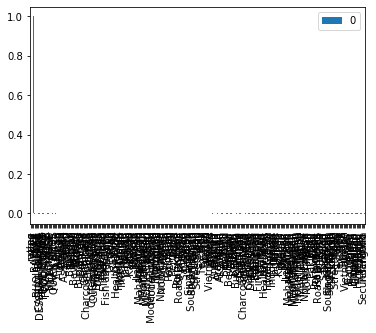

In [431]:
pd.DataFrame(linear.coef_,train_x.columns).plot(kind = "bar")

In [432]:
train_predict = linear.predict(train_x)

In [433]:
test_predict = linear.predict(test_x)

In [434]:
np.sqrt(mean_squared_error(train_predict,train_y))

1.2173097596015683e-12

In [435]:
np.sqrt(mean_squared_error(test_predict,test_y))

3.400470150682771e-05

In [441]:
test_x.rating.unique()

array([4.7, 4.6, 4.2, 3.9, 4.5, 4.4, 2.6, 3.7, 3.6, 4. , 3.4, 4.3, 3.5,
       3.8, 3.3, 3.2, 3. , 3.1, 2.8, 4.1, 2.9, 2.4, 2.7, 2.5, 4.8, 4.9,
       2.2, 2.3])

In [436]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(train_x)
X_test_poly = poly_reg.fit_transform(test_x)

X_poly = poly_reg.fit_transform(X)
X_test_poly = poly_reg.fit_transform(test_preprocessed.drop(columns=["rating", "votes"]))

pol_reg = LinearRegression()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').